In [1]:
from typing import TypedDict, Dict 
from langgraph.graph import StateGraph, START, END

In [3]:
class MyState(TypedDict):
    number1:int 
    number2:int 
    number3:int 
    number4:int 
    final_answer:int 
    final_answer2:int 
    operation:str 
    operation2:str 

def add_node(state:MyState)->MyState:
    state['final_answer'] = state['number1'] + state['number2']
    return state

def subtract_node(state:MyState) ->MyState:
    state['final_answer'] = state['number1'] - state['number2']
    return state

def add_node2(state:MyState)->MyState:
    state['final_answer2'] = state['final_answer'] + state['number3']
    return state

def subtract_node2(state:MyState) ->MyState:
    state['final_answer2'] = state['final_answer'] - state['number3']
    return state

def decide_next_node(state:MyState) -> MyState:
    if state['operation'] == '+':
        return 'addition_operation'
    else:
        return 'subtraction_operation'

def decide_next_node2(state:MyState) -> MyState:
    if state['operation2'] == '+':
        return 'addition_operation_2'
    else:
        return 'subtraction_operation_2'

In [13]:
graph = StateGraph(MyState)
graph.add_node('add_node', add_node)
graph.add_node('subtract_node', subtract_node)
graph.add_node('router',lambda state:state)
graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',decide_next_node,{'addition_operation':'add_node','subtraction_operation':'subtract_node'}
)

graph.add_node('add_node2', add_node2)
graph.add_node('subtract_node2', subtract_node2)
graph.add_node('router2',lambda state:state)
graph.add_edge('add_node', 'router2')
graph.add_edge('subtract_node', 'router2')
graph.add_conditional_edges(
    'router2',decide_next_node2,{'addition_operation_2':'add_node2','subtraction_operation_2':'subtract_node2'}
)

graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)

app = graph.compile()

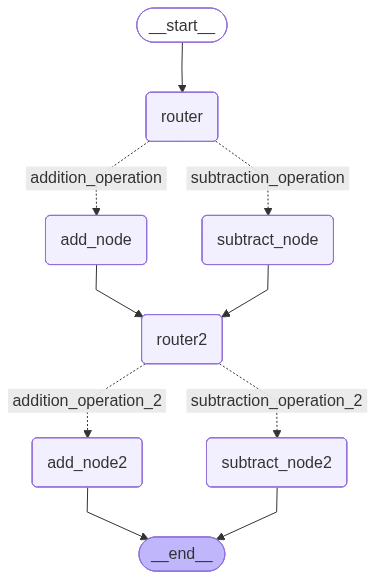

In [14]:
from IPython.display import Image, display 
display(Image(app.get_graph().draw_mermaid_png()))


In [16]:
res = MyState(number1=10,number2 = 5,number3 = 7,number4 = 2,operation='-',operation2='+')
output = app.invoke(res)
print(output['final_answer'])
print(output['final_answer2'])

5
12
